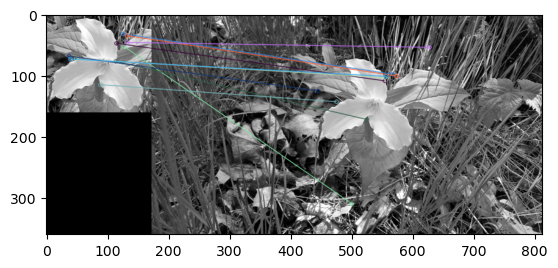

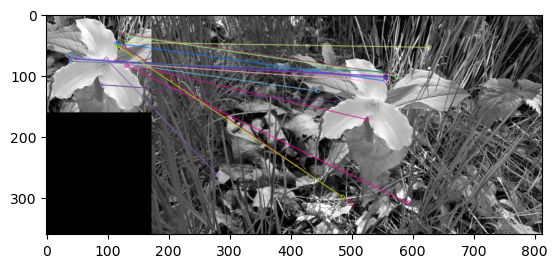

(<matplotlib.image.AxesImage at 0x23ee227bb10>, None)

In [3]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Opening images
query_image = cv.imread('Trillium_t.jpg', cv.IMREAD_GRAYSCALE) # queryImage
train_image = cv.imread('Trillium_s.jpg', cv.IMREAD_GRAYSCALE) # trainImage

# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints and descriptors with ORB
keypoint1, descriptor1 = orb.detectAndCompute(query_image, None)
keypoint2, descriptor2 = orb.detectAndCompute(train_image, None)

# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(descriptor1, descriptor2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
result = cv.drawMatches(query_image,keypoint1,train_image,keypoint2,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(result), plt.show()

# Draw first 15 matches.
result = cv.drawMatches(query_image,keypoint1,train_image,keypoint2,matches[:15],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(result), plt.show()

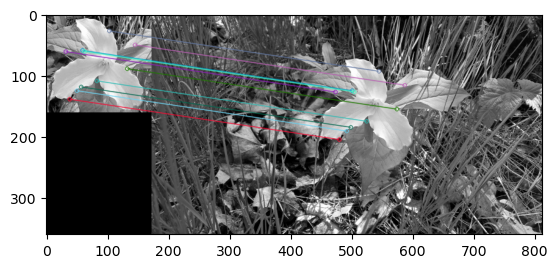

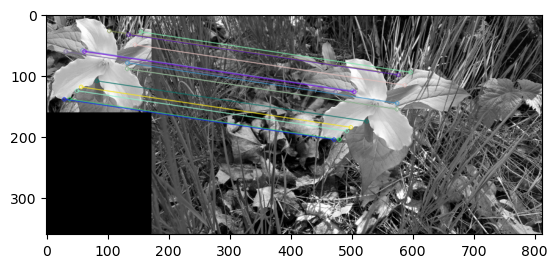

(<matplotlib.image.AxesImage at 0x23ee23282d0>, None)

In [4]:
# b.	FlannBasedMatcher (remove crossCheck argument)

# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
keypoint1, descriptor1 = sift.detectAndCompute(query_image,None)
keypoint2, descriptor2 = sift.detectAndCompute(train_image,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50) # or pass empty dictionary
flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(descriptor1,descriptor2,k=2)
# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# Store good matches using Lowe's ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)
good_matches = sorted(good_matches, key=lambda x: x.distance)

# Draw first 10 matches.
result = cv.drawMatches(query_image,keypoint1,train_image,keypoint2,good_matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(result), plt.show()

# Draw first 15 matches.
result = cv.drawMatches(query_image,keypoint1,train_image,keypoint2,good_matches[:15],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
good_matches
plt.imshow(result), plt.show()

Center:  (86, 80)


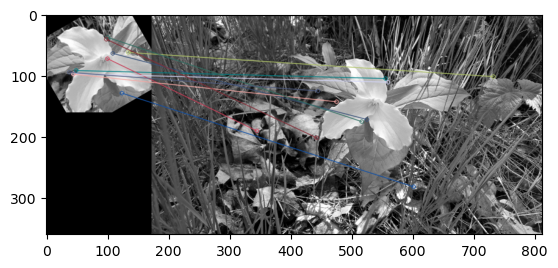

(<matplotlib.image.AxesImage at 0x23ee225b750>, None)

In [6]:
# Getting the dimensions of the query image
query_height = query_image.shape[0]
query_width = query_image.shape[1]

# Calculating the rotation matrix for a 30-degree rotation around the center
center = (query_width // 2, query_height // 2)
print("Center: ", center)
rotation_matrix = cv.getRotationMatrix2D(center, 30, 1.0)

# Applying the rotation to the query image
rotated_image = cv.warpAffine(query_image, rotation_matrix, (query_width, query_height))

# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints and descriptors with ORB
keypoint1, descriptor1 = orb.detectAndCompute(rotated_image, None)
keypoint2, descriptor2 = orb.detectAndCompute(train_image, None)

# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(descriptor1, descriptor2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
result = cv.drawMatches(rotated_image,keypoint1,train_image,keypoint2,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(result), plt.show()